#Week 5- Information Retrieval - Vector Space Model 

#Part1: Simple example

****
Assume we have 3 document in the corpus. For each of query text, we can ranking these 3 document based on the similarity between the query text and the document.

In [18]:
#Step 1 tokenize the document.
doc1="information retrieval search engine information"
doc2="travel information map travel"
doc3="government president congress"

#tokenize- Because this is simple document, so I use split() functon to tokenize.
doc1_token= doc1.split()
doc2_token= doc2.split()
doc3_token=doc3.split()
doc_all = {"doc1":doc1_token, "doc2":doc2_token, "doc3":doc3_token}
print(doc_all)

{'doc1': ['information', 'retrieval', 'search', 'engine', 'information'], 'doc2': ['travel', 'information', 'map', 'travel'], 'doc3': ['government', 'president', 'congress']}


In [0]:

# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

In [20]:
# example count how many doc cotain term information
 numDocsContaining("information", doc_all.values())

2

In [21]:
#create bag words
bag_words =[] # declare bag_words is a list
for doc in doc_all.keys():
    bag_words += doc_all[doc]
bag_words=set(bag_words)
print(bag_words)

{'map', 'search', 'president', 'engine', 'congress', 'information', 'retrieval', 'travel', 'government'}


In [22]:
#calculate idf for every word in bag_words
bag_words_idf={} # declare "bag_words_idf" data structure is dictionary 
for word in bag_words:
    bag_words_idf[word]= idf(word,doc_all.values())

print(bag_words_idf)

{'map': 0.47712125471966244, 'search': 0.47712125471966244, 'president': 0.47712125471966244, 'engine': 0.47712125471966244, 'congress': 0.47712125471966244, 'information': 0.17609125905568124, 'retrieval': 0.47712125471966244, 'travel': 0.47712125471966244, 'government': 0.47712125471966244}


In [23]:
#calculate tfidf without normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all.keys():
    tfidf_doc={} # delare tfidf_doc as a dictionary to store tfidf of each doc
    for term in set(doc_all[doc]):
        tfidf_doc[term]= tf(term,doc_all[doc]) * bag_words_idf[term] # calculate tfidf for each doc
    tfidf[doc]= tfidf_doc
tfidf

{'doc1': {'engine': 0.09542425094393249,
  'information': 0.0704365036222725,
  'retrieval': 0.09542425094393249,
  'search': 0.09542425094393249},
 'doc2': {'information': 0.04402281476392031,
  'map': 0.11928031367991561,
  'travel': 0.23856062735983122},
 'doc3': {'congress': 0.15904041823988746,
  'government': 0.15904041823988746,
  'president': 0.15904041823988746}}

In [24]:
#convert to pandas frame without normalization
import pandas as pd
tfidf_dataframe = pd.DataFrame(tfidf).transpose()
tfidf_dataframe

,information,retrieval,engine,search,travel,map,president,congress,government
doc1,0.070437,0.095424,0.095424,0.095424,NaN,NaN,NaN,NaN,NaN
doc2,0.044023,NaN,NaN,NaN,0.238561,0.11928,NaN,NaN,NaN
doc3,NaN,NaN,NaN,NaN,NaN,NaN,0.15904,0.15904,0.15904


In [0]:
#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
    import numpy as np
    dic_norm={}
    factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
    for k in dic:
        dic_norm[k] = dic[k]*factor
    return dic_norm

In [26]:
dic={'a':-0.2, 'b':0.2, 'c':0.2}
#dic_value= list((dic_data .values()))
import numpy as np
np.sqrt(sum([np.square(i) for i in dic.values()]))

0.3464101615137755

In [27]:
#calculate tfidf with cosine normalization
tfidf_norm={} # declare tfidf dictionary to store tfidf value
for doc in doc_all.keys():
    tfidf_doc={} # delare tfidf_doc as a dictionary to store tfidf of each doc
    for term in set(doc_all[doc]):
        tfidf_doc[term]= tf(term,doc_all[doc]) * bag_words_idf[term] # calculate tfidf for each doc
    tfidf_norm[doc]= cos_norm(tfidf_doc)
tfidf_norm

{'doc1': {'engine': 0.5311301848132919,
  'information': 0.392048696389358,
  'retrieval': 0.5311301848132919,
  'search': 0.5311301848132919},
 'doc2': {'information': 0.16284991207632715,
  'map': 0.4412436755664001,
  'travel': 0.8824873511328002},
 'doc3': {'congress': 0.5773502691896257,
  'government': 0.5773502691896257,
  'president': 0.5773502691896257}}

In [28]:
#convert to pandas frame with normalization
import pandas as pd
tfidf_dataframe = pd.DataFrame(tfidf_norm).transpose()
tfidf_dataframe

,information,retrieval,engine,search,travel,map,president,congress,government
doc1,0.392049,0.53113,0.53113,0.53113,NaN,NaN,NaN,NaN,NaN
doc2,0.162850,NaN,NaN,NaN,0.882487,0.441244,NaN,NaN,NaN
doc3,NaN,NaN,NaN,NaN,NaN,NaN,0.57735,0.57735,0.57735


In [29]:
query="information retrieval information I"
query_token_raw= query.split()
#take intersection between query_token and bag_words to remove the "I" because "I" doesn't exist in bag_words
query_token = [term for term in query_token_raw if term in bag_words]
print(query_token_raw)
print(query_token)

['information', 'retrieval', 'information', 'I']
['information', 'retrieval', 'information']


In [30]:
#term frequency of the query text
tf_query={}
for term in set(query_token):
    tf_query[term]=tf(term,query_token)
tf_query

{'information': 0.6666666666666666, 'retrieval': 0.3333333333333333}

In [0]:
# create normalize term frequency
def tf_norm(token_doc):
    tf_norm={}
    for term in token_doc:
        tf = token_doc.count(term)/len(token_doc)
        tf_norm[term]=tf
    tf_max = max(tf_norm.values())
    for term, value in tf_norm.items():
        tf_norm[term]= 0.5 + 0.5*value/tf_max
    return tf_norm

In [32]:
#term frequency normalize of the query text
tf_norm(query_token)

{'information': 1.0, 'retrieval': 0.75}

In [33]:
#calculate tfidf for query
tf_norm_query = tf_norm(query_token)
tfidf_query={}
for term, value in tf_norm_query.items():
    tfidf_query[term]=value*bag_words_idf[term]
tfidf_query

{'information': 0.17609125905568124, 'retrieval': 0.35784094103974684}

In [34]:
# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf["query"]=tfidf_query
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero
tfidf_df

,information,retrieval,engine,search,travel,map,president,congress,government
doc1,0.070437,0.095424,0.095424,0.095424,0.000000,0.00000,0.00000,0.00000,0.00000
doc2,0.044023,0.000000,0.000000,0.000000,0.238561,0.11928,0.00000,0.00000,0.00000
doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.15904,0.15904,0.15904
query,0.176091,0.357841,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000


In [35]:
from scipy.spatial.distance import cosine
# consine similarity query and doc1
print(1-cosine(tfidf_df.loc["doc1"],tfidf_df.loc["query"]))

0.6496558809430822


In [36]:
#calculate cosine similarity for all document
cosine_sim ={}
for row in tfidf_df.index:
    if row != "query":
        cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])
cosine_sim

{'doc1': 0.6496558809430822, 'doc2': 0.0719030311660519, 'doc3': 0.0}

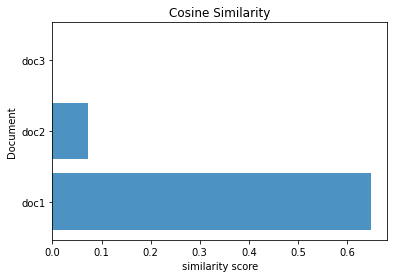

In [37]:
#plot barchart
import matplotlib.pyplot as plt
plt.barh(range(len(cosine_sim)), list(cosine_sim.values()), align='center', alpha=0.8)
plt.yticks(range(len(cosine_sim)), list(cosine_sim.keys())) # label for y axis
plt.xlabel('similarity score')
plt.ylabel('Document')
plt.title('Cosine Similarity')
plt.show()

**Information retreival - Vector space model - Summary**

In [0]:
# Declare all function 
# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist - this list of all documents
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
    import numpy as np
    dic_norm={}
    factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
    for k in dic:
        dic_norm[k] = dic[k]*factor
    return dic_norm

#create function to calculate normalize tfidf 
def compute_tfidf(token_doc,bag_words_idf):
    tfidf_doc={}
    for word in set(token_doc):
        tfidf_doc[word]= tf(word,token_doc) * bag_words_idf[word]   
    tfidf_norm = cos_norm(tfidf_doc)
    return tfidf_norm

# create normalize term frequency
def tf_norm(token_doc):
    tf_norm={}
    for term in token_doc:
        tf = token_doc.count(term)/len(token_doc)
        tf_norm[term]=tf
    tf_max = max(tf_norm.values())
    for term, value in tf_norm.items():
        tf_norm[term]= 0.5 + 0.5*value/tf_max
    return tf_norm

def compute_tfidf_query(query_token,bag_words_idf):
    tfidf_query={}
    tf_norm_query = tf_norm(query_token)
    for term, value in tf_norm_query.items():
        tfidf_query[term]=value*bag_words_idf[term]   
    return tfidf_query

In [39]:
doc1="information retrieval search engine information"
doc2="travel information map travel"
doc3="government president congress"

doc_all = {"doc1":doc1.split(), "doc2":doc2.split(), "doc3":doc3.split()}

#create bag words
bag_words =[] # declare bag_words is a list
for doc in doc_all.keys():
    bag_words += doc_all[doc]
bag_words=set(bag_words)

#calculate idf for every word in bag_words
bag_words_idf={} # declare "bag_words_idf" data structure is dictionary 
for word in bag_words:
    bag_words_idf[word]= idf(word,doc_all.values())

##calculate tfidf with cosine normalization
tfidf={} # declare tfidf dictionary to store tfidf value
for doc in doc_all.keys():
    tfidf[doc]= compute_tfidf(doc_all[doc],bag_words_idf)

tfidf

{'doc1': {'engine': 0.5311301848132919,
  'information': 0.392048696389358,
  'retrieval': 0.5311301848132919,
  'search': 0.5311301848132919},
 'doc2': {'information': 0.16284991207632715,
  'map': 0.4412436755664001,
  'travel': 0.8824873511328002},
 'doc3': {'congress': 0.5773502691896257,
  'government': 0.5773502691896257,
  'president': 0.5773502691896257}}

In [40]:
query="information retrieval I information"
query_token_raw= query.split()
#take intersection between query_token and bag_words to remove the "I" because "I" doesn't exist in bag_words
query_token = [term for term in query_token_raw if term in bag_words]

tfidf_query =compute_tfidf_query(query_token,bag_words_idf) #calculate tfidf for query text
print(tfidf_query)

{'information': 0.17609125905568124, 'retrieval': 0.35784094103974684}


In [41]:
# add tfidf of query text to tfidf of all document and convert to dataframe
tfidf["query"]=tfidf_query
import pandas as pd
tfidf_df = pd.DataFrame(tfidf).transpose()
tfidf_df= tfidf_df.fillna(0) # replace all NaN by zero

cosine_sim ={}
for row in tfidf_df.index:
    if row != "query":
        cosine_sim[row]= 1-cosine(tfidf_df.loc[row],tfidf_df.loc["query"])

print(cosine_sim)

{'doc1': 0.6496558809430824, 'doc2': 0.0719030311660519, 'doc3': 0.0}


#Part 2.More complex example

**Query and find the most Relevant NTHU GEC Course syllabuses**

In [42]:
#Mount google drive to google colab virtual machine
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Step1: run the following code to download download NTHU GEC course syllabuses (pdf.zip) from Daniel gooogle drive, then extract it to pdf folder and save to your /content/drive/My Drive/Colab Notebooks/"**

In [43]:
def download_data_gdown(path,file_id):
    import gdown, os, zipfile, sys
    url = f"https://drive.google.com/uc?id={file_id}"
    data_zip = os.path.join(path, "pdf.zip")
    gdown.download(url, data_zip, quiet=False)
    
    with zipfile.ZipFile(data_zip, "r") as zip_ref:
        zip_ref.extractall(path)
    return
download_data_gdown(path=mydrive,file_id="1sJntA4rhGr_OcV9VwJvUu2hl6T0NTtKg")

Downloading...
From: https://drive.google.com/uc?id=1sJntA4rhGr_OcV9VwJvUu2hl6T0NTtKg
To: /content/drive/My Drive/Colab Notebooks/pdf.zip
15.5MB [00:00, 38.7MB/s]


**Step2: run the following code create a folder name "txt", and convert all file in folder "pdf"  to folder "txt"**

In [47]:
#Run to load pdf to txt function
!pip3 install pdfminer.six #package pdf to text
import os
from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def convert(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)

    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, codec='utf-8', laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)
    infile = open(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close
    return text
    
        
def convertMultiple(pdfDir, txtDir):
    for pdf in os.listdir(pdfDir): #iterate through pdfs in pdf directory
        fileExtension = pdf.split(".")[-1]
        if fileExtension == "pdf":
            pdfFilename = pdfDir + pdf 
            text = convert(pdfFilename) #get string of text content of pdf
            textFilename = txtDir + pdf[:-4] + ".txt"
            textFile = open(textFilename, "w") #make text file
            textFile.write(text) #write text to text file
            textFile.close()
            print("finish convert to txt", pdf)
    print("finish convert all file")


#create directory txt
#os.mkdir(mydrive+ 'txt') # you have to remove this line if the txt folder is exist.
# covert all file in folder pdf to text file and store in folder "txt"
mydrive ="/content/drive/My Drive/Colab Notebooks/"
pdfdir= mydrive + "pdf/"
txtdir= mydrive +"txt/"
convertMultiple(pdfdir,txtdir)

finish convert to txt 10620GEC 170100.pdf
finish convert to txt 10620GEC 170201.pdf
finish convert to txt 10620HIS 233000.pdf
finish convert to txt 10620HIS 233201.pdf
finish convert to txt 10620HIS 233700.pdf
finish convert to txt 10620HIS 233800.pdf
finish convert to txt 10620ECON100201.pdf
finish convert to txt 10620ECON100203.pdf
finish convert to txt 10620ECON100205.pdf
finish convert to txt 10620ECON100206.pdf
finish convert to txt 10620ECON100300.pdf
finish convert to txt 10620GEC 110100.pdf
finish convert to txt 10620GEC 110200.pdf
finish convert to txt 10620GEC 110300.pdf
finish convert to txt 10620GEC 110500.pdf
finish convert to txt 10620GEC 110600.pdf
finish convert to txt 10620GEC 110801.pdf
finish convert to txt 10620GEC 111000.pdf
finish convert to txt 10620GEC 120101.pdf
finish convert to txt 10620GEC 120201.pdf
finish convert to txt 10620GEC 120203.pdf
finish convert to txt 10620GEC 120302.pdf
finish convert to txt 10620GEC 120304.pdf
finish convert to txt 10620GEC 120

**Begin Information Retrieval processing** . 

This code will find the best relevant syllabuses from data with your query search. (user input text)

In [0]:
# create tf function
def tf(term, token_doc):
    tf = token_doc.count(term)/len(token_doc)
    return tf

# create function to calculate how many doc contain the term 
def numDocsContaining(word, token_doclist):
    doccount = 0
    for doc_token in token_doclist:
        if doc_token.count(word) > 0:
            doccount +=1
    return doccount
  
import math
# create function to calculate  Inverse Document Frequency in doclist - this list of all documents
def idf(word, token_doclist):
    n = len(token_doclist)
    df = numDocsContaining(word, token_doclist)
    return math.log10(n/df)

#define a function to do cosine normalization a data dictionary
def cos_norm(dic): # dic is distionary data structure
    import numpy as np
    dic_norm={}
    factor=1.0/np.sqrt(sum([np.square(i) for i in dic.values()]))
    for k in dic:
        dic_norm[k] = dic[k]*factor
    return dic_norm

#create function to calculate normalize tfidf 
def compute_tfidf(token_doc,bag_words_idf):
    tfidf_doc={}
    for word in set(token_doc):
        tfidf_doc[word]= tf(word,token_doc) * bag_words_idf[word]   
    tfidf_norm = cos_norm(tfidf_doc)
    return tfidf_norm

# create normalize term frequency
def tf_norm(token_doc):
    tf_norm={}
    for term in token_doc:
        tf = token_doc.count(term)/len(token_doc)
        tf_norm[term]=tf
    tf_max = max(tf_norm.values())
    for term, value in tf_norm.items():
        tf_norm[term]= 0.5 + 0.5*value/tf_max
    return tf_norm

def compute_tfidf_query(query_token,bag_words_idf):
    tfidf_query={}
    tf_norm_query = tf_norm(query_token)
    for term, value in tf_norm_query.items():
        tfidf_query[term]=value*bag_words_idf[term]   
    return tfidf_query

*We use the bigger dictionary that has better support tokenization for traditional Chinese (繁體) at 
https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big. we download the jieba big dictionary and save to /content/drive/My Drive/Colab Notebooks/chinese/

In [49]:
#install wget if you not yet install wget
!pip install wget
#Download jieba big dictionary from github
import wget,os
#os.mkdir(mydrive+ "chinese") # you have to remove this line if the chinese folder is exist.
url_bigdict = 'https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big'
wget.download(url_bigdict, mydrive+"chinese")

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=5bac0cd952cabae3e2690b2c2431b94d4e19ae1f85edcbb9893caf4ec887bba1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'/content/drive/My Drive/Colab Notebooks/chinese'

**Build our stopwords (both chinese and English)**

In [50]:
#download chinese stopwords file at https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt
# and save to your computer, you also add more chinese stopwords
import requests
url = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-zh/master/stopwords-zh.txt'
r = requests.get(url, allow_redirects=True)
open('chinese_stopwords.txt', 'wb').write(r.content)
cn_stopwords_path="chinese_stopwords.txt"
cn_stopwords = [line.strip() for line in open(cn_stopwords_path, 'r', encoding='utf-8').readlines()]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')
stopwords= cn_stopwords+ en_stopwords
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['、', '。', '〈', '〉', '《', '》', '一', '一个', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一种', '一般', '一转眼', '七', '万一', '三', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '中', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '九', '也', '也好', '也罢', '了', '二', '二来', '于', '于是', '于是乎', '云云', '云尔', '五', '些', '亦', '人', '人们', '人家', '什', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他', '他人', '他们', '他们们', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '会', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', 

In [0]:
# this code will read all file in txt folder, tokenize using jieba, remove punctuation, remove stopword and combine all file into doc_all
import jieba,os
jieba.load_userdict(mydrive + "chinese")

file_path = mydrive +"txt/"
doc_all_2={}

for filename in os.listdir(file_path ):
    fileExtension = filename.split(".")[-1]
    if fileExtension == "txt":
        text = open(file_path+filename).read()
        tokens = list(jieba.cut(text))
        token_filtered = [w.lower() for w in tokens if w.isalpha() and len(w)>1 and not word in stopwords]
        doc_all_2[filename[:-4]]=token_filtered

In [54]:
doc_all_2

{'10620ECON100201': ['syllabus',
  '經濟學',
  '原理',
  'principles',
  'of',
  'economics',
  'ii',
  'spring',
  'class',
  'information',
  'course',
  'time',
  'location',
  '台積',
  'instructor',
  'contact',
  'instructor',
  'elaine',
  'chyi',
  'office',
  'hrs',
  'tues',
  'or',
  'by',
  'appt',
  'email',
  'ylchyi',
  'mx',
  'nthu',
  'edu',
  'tw',
  'tel',
  'ext',
  'ta',
  'contact',
  'tba',
  'general',
  'information',
  'course',
  'description',
  'this',
  'course',
  'is',
  'an',
  'introduction',
  'to',
  'macroeconomics',
  'study',
  'mainly',
  'of',
  'business',
  'cycle',
  'fluctuations',
  'and',
  'long',
  'run',
  'economic',
  'growth',
  'you',
  'will',
  'not',
  'only',
  'learn',
  'how',
  'economists',
  'study',
  'the',
  'economy',
  'as',
  'whole',
  'but',
  'better',
  'understand',
  'your',
  'home',
  'as',
  'well',
  'as',
  'the',
  'world',
  'economy',
  'the',
  'goal',
  'is',
  'to',
  'equip',
  'you',
  'with',
  'tools',


In [0]:
#create bag words
bag_words_2 =[] # declare bag_words is a list
for doc in doc_all_2.keys():
    bag_words_2 += doc_all_2[doc]
bag_words_2=set(bag_words_2)

#calculate idf for every word in bag_words
bag_words_idf_2={} # declare "bag_words_idf" data structure is dictionary 
for word in bag_words_2:
    bag_words_idf_2[word]= idf(word,doc_all_2.values())

##calculate tfidf with cosine normalization
tfidf_2={} # declare tfidf dictionary to store tfidf value
for doc in doc_all_2.keys():
    tfidf_2[doc]= compute_tfidf(doc_all_2[doc],bag_words_idf_2)

In [56]:
query_2="我想了解當代台灣文學藝術，有關女性議題"
query_token_raw_2= list(jieba.cut(query_2))
query_token_2 = [term for term in query_token_raw_2 if term in bag_words_2]

tfidf_query_2 =compute_tfidf_query(query_token_2,bag_words_idf_2) #calculate tfidf for query text
print(tfidf_query_2)

{'了解': 0.5740312677277188, '當代': 0.6989700043360189, '台灣': 0.3521825181113625, '文學藝術': 1.6532125137753437, '有關': 0.5740312677277188, '女性': 1.3521825181113625, '議題': 0.3521825181113625}


In [57]:
# add tfidf of query text to tfidf of all doc and convert to dataframe
tfidf_2["query"]=tfidf_query_2

import pandas as pd
tfidf_df_2 = pd.DataFrame(tfidf_2).transpose()
tfidf_df_2= tfidf_df_2.fillna(0) # replace all NaN by zero

cosine_sim ={}
for row in tfidf_df_2.index:
    if row != "query":
    cosine_sim[row]= 1-cosine(tfidf_df_2.loc[row],tfidf_df_2.loc["query"])

# the top 10 relevant document
cosine_sim_top10 = dict(sorted(cosine_sim.items(), key=lambda item: item[1],reverse=True)[:10])
print(cosine_sim_top10)

{'10620GEC 130401': 0.10331760601208206, '10620GEC 110100': 0.04502512560684613, '10620GEC 110300': 0.044013448647672204, '10620GEC 140202': 0.03350641566178125, '10620GEC 150201': 0.026024395953410773, '10620GEC 120601': 0.022058912967689137, '10620GEC 170100': 0.01877140139005895, '10620GEC 150100': 0.01755904076806858, '10620GEC 140402': 0.01644966438939255, '10620GEC 170201': 0.016131065829410596}


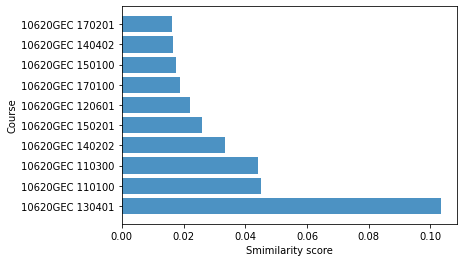

In [58]:

#plot barchart
import matplotlib.pyplot as plt
data = cosine_sim_top10
plt.barh(range(len(data)), list(data.values()), align='center', alpha=0.8)
plt.yticks(range(len(data)), list(data.keys())) # label for y axis
plt.xlabel('Smimilarity score')
plt.ylabel('Course')

# save graph
plt.savefig(mydrive+"barchart.png", bbox_inches='tight', dpi=600)
plt.show()